# Alpha Vantage API

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
key = open('1-alphavantage.txt').read()
from alpha_vantage.sectorperformance import SectorPerformances

In [33]:
sp = SectorPerformances(key, output_format='pandas')
data, meta_data = sp.get_sector()

In [34]:
meta_data

{'Information': 'US Sector Performance (realtime & historical)',
 'Last Refreshed': '2021-01-08 11:54:15 US/Eastern'}

In [35]:
data.head()

,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
Consumer Discretionary,0.0135,0.0180,0.0199,0.0423,0.1015,0.0200,0.3365,0.6385,1.2042,3.4628
Energy,0.0088,0.0149,0.0852,0.0334,0.3879,0.0941,-0.3229,-0.4353,-0.2782,-0.3811
Real Estate,0.0055,0.0031,-0.0238,-0.0481,-0.0255,-0.0360,-0.0818,0.0988,NaN,NaN
Utilities,0.0036,-0.0133,0.0006,-0.0035,-0.0023,-0.0150,-0.0330,0.2055,0.4238,0.9647
Information Technology,0.0030,0.0265,-0.0002,0.0317,0.1228,-0.0032,0.4043,0.9812,2.2712,4.4857


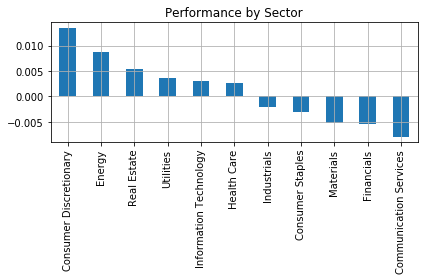

In [36]:
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title("Performance by Sector")
plt.tight_layout()
plt.grid(True)

In [37]:
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.timeseries import TimeSeries

In [63]:
ta = TechIndicators(key, output_format='pandas')

In [65]:
goog, meta = ta.get_sma('GOOG', interval='daily', time_period=200, series_type='close')

In [66]:
goog.head()

,SMA
date,
2015-01-09,552.7623
2015-01-12,552.4327
2015-01-13,552.1137
2015-01-14,551.8332
2015-01-15,551.5063


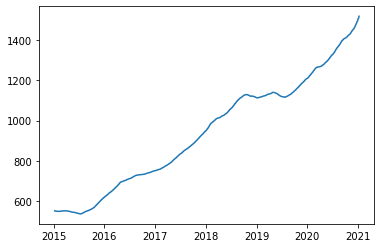

In [67]:
plt.plot(goog)

In [68]:
ts = TimeSeries(key, output_format='pandas')

In [69]:
prices,meta = ts.get_daily('GOOG', outputsize='full')

In [70]:
prices.columns = ['open','high','low','close','volume']
prices.sort_index(inplace=True)
prices.head()

,open,high,low,close,volume
date,,,,,
2014-03-27,568.000,568.00,552.92,558.46,13100.0
2014-03-28,561.200,566.43,558.67,559.99,41100.0
2014-03-31,566.890,567.00,556.93,556.97,10800.0
2014-04-01,558.710,568.45,558.71,567.16,7900.0
2014-04-02,565.106,604.83,562.19,567.00,146700.0


In [71]:
prices = prices.loc['2015-01-09':]

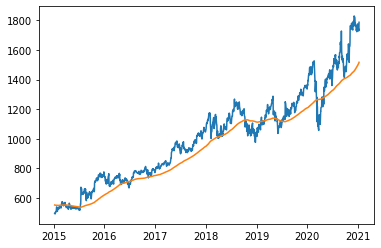

In [72]:
plt.plot(prices['close'])
plt.plot(goog)

#### https://www.alphavantage.co/documentation/

In [73]:
import requests
import json

In [74]:
symbol = 'GOOG'

call = requests.get(f'https://www.alphavantage.co/query?function=OVERVIEW&symbol={symbol}&apikey={key}').text

In [75]:
call = json.loads(call)
call = pd.DataFrame.from_dict(call, orient='index')

In [79]:
call.loc['Symbol']

0    GOOG
Name: Symbol, dtype: object

#### Other API function calls: BALANCE_SHEET INCOME_STATEMENT  CASH_FLOW EARNINGS

In [80]:
symbol = 'GOOG'
function = 'EARNINGS'
call = requests.get(f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={key}").text

In [81]:
call = json.loads(call)
call

{'symbol': 'GOOG',
 'annualEarnings': [{'fiscalDateEnding': '2020-09-30', 'reportedEPS': '36.4'},
  {'fiscalDateEnding': '2019-12-31', 'reportedEPS': '52.38'},
  {'fiscalDateEnding': '2018-12-31', 'reportedEPS': '47.0794'},
  {'fiscalDateEnding': '2017-12-31', 'reportedEPS': '38.176'},
  {'fiscalDateEnding': '2016-12-31', 'reportedEPS': '34.34'},
  {'fiscalDateEnding': '2015-12-31', 'reportedEPS': '29.58'},
  {'fiscalDateEnding': '2014-12-31', 'reportedEPS': '28.2406'}],
 'quarterlyEarnings': [{'fiscalDateEnding': '2020-09-30',
   'reportedDate': '2020-10-29',
   'reportedEPS': '16.4',
   'estimatedEPS': '11.1964',
   'surprise': '5.2036',
   'surprisePercentage': '46.4757'},
  {'fiscalDateEnding': '2020-06-30',
   'reportedDate': '2020-07-30',
   'reportedEPS': '10.13',
   'estimatedEPS': '8.2091',
   'surprise': '1.9209',
   'surprisePercentage': '23.3996'},
  {'fiscalDateEnding': '2020-03-31',
   'reportedDate': '2020-04-28',
   'reportedEPS': '9.87',
   'estimatedEPS': '10.762',
  

In [82]:
pd.DataFrame(call['quarterlyEarnings'])

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage
0,2020-09-30,2020-10-29,16.4,11.1964,5.2036,46.4757
1,2020-06-30,2020-07-30,10.13,8.2091,1.9209,23.3996
2,2020-03-31,2020-04-28,9.87,10.762,-0.892,-8.2884
3,2019-12-31,2020-02-03,15.35,12.5938,2.7562,21.8854
4,2019-09-30,2019-10-28,10.92,12.709,-1.789,-14.0766
5,2019-06-30,2019-07-25,14.21,11.471,2.739,23.8776
6,2019-03-31,2019-04-29,11.9,10.3995,1.5005,14.4286
7,2018-12-31,2019-02-04,12.77,10.9778,1.7922,16.3257
8,2018-09-30,2018-10-25,13.06,10.4613,2.5987,24.8411
9,2018-06-30,2018-07-23,11.75,9.5405,2.2095,23.1592
